# Experimenting with Random Model
---------------

In [1]:
import __init__
import models.cross_validator as cross_validator
import models.datahandler as datahandler
from models.datamodel import DataModel
import models.outputmaker as outputmaker
import evaluator.metrics as metrics

trial = datahandler.load_train('../data/dataset/tsd_trial.csv', verbose=True)
train = datahandler.load_train('../data/dataset/tsd_train.csv', verbose=True)

/home/hb/.local/lib/python3.6/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


,spans,text
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...
1,"[29, 30, 31, 32, 33, 34]",How about we stop protecting idiots and let na...
2,"[166, 167, 168, 169, 170, 171]","If people were smart, they would Boycott th..."


,spans,text
0,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...",Another violent and aggressive immigrant killi...
1,"[33, 34, 35, 36, 37, 38, 39]","I am 56 years old, I am not your fucking junio..."
2,"[0, 1, 2, 3]","Damn, a whole family. Sad indeed."


In [2]:
datamodel = DataModel(model='crf')

In [20]:
X_train, y_train , T_train, train_texts = cross_validator.load_data(train, [i for i in range(train.shape[0])], 
                                                    datamodel, logger=True)

X_test, y_test , T_test, test_texts = cross_validator.load_data(trial, [i for i in range(trial.shape[0])], 
                                                           datamodel, logger=True)

100%|██████████| 690/690 [00:10<00:00, 67.53it/s]


---------------

# 1. No of toxic words and non-toxic words

----------------

In [21]:
toxics, normals = [], []
for X in X_train:
    for token in X:
        if token[2] == 'toxic':
            toxics.append(token)
        else:
            normals.append(token)

In [22]:
print("# of normal words:{} ,   # of toxic words:{}".format(len(normals), len(toxics)))

# of normal words:320541 ,   # of toxic words:25502


---------------

# 2. No of POS in toxic and non-toxic words

----------------

In [33]:
from collections import defaultdict

def pos_tf(tokens):
    pos = defaultdict(int)
    for token in tokens:
        pos[token[1]] += 1
    return pos

print("POS frequencies in toxic words:\n", pos_tf(toxics))
print("............................")
print("POS frequencies in non-toxic words:\n", pos_tf(normals))

POS frequencies in toxic words:
 defaultdict(<class 'int'>, {'ADJ': 4894, 'CCONJ': 467, 'NOUN': 7441, 'INTJ': 102, 'PUNCT': 1329, 'PRON': 1114, 'VERB': 2444, 'PROPN': 1787, 'DET': 1762, 'AUX': 979, 'ADV': 808, 'SCONJ': 306, 'NUM': 98, 'SPACE': 300, 'ADP': 1205, 'PART': 423, 'X': 20, 'SYM': 23})
............................
POS frequencies in non-toxic words:
 defaultdict(<class 'int'>, {'DET': 34485, 'VERB': 37211, 'ADJ': 19887, 'CCONJ': 9530, 'PROPN': 16593, 'PUNCT': 42572, 'PRON': 23232, 'AUX': 20649, 'NUM': 2292, 'NOUN': 46434, 'PART': 9911, 'ADP': 23800, 'ADV': 16814, 'SPACE': 8404, 'SCONJ': 6420, 'INTJ': 1656, 'SYM': 349, 'X': 302})


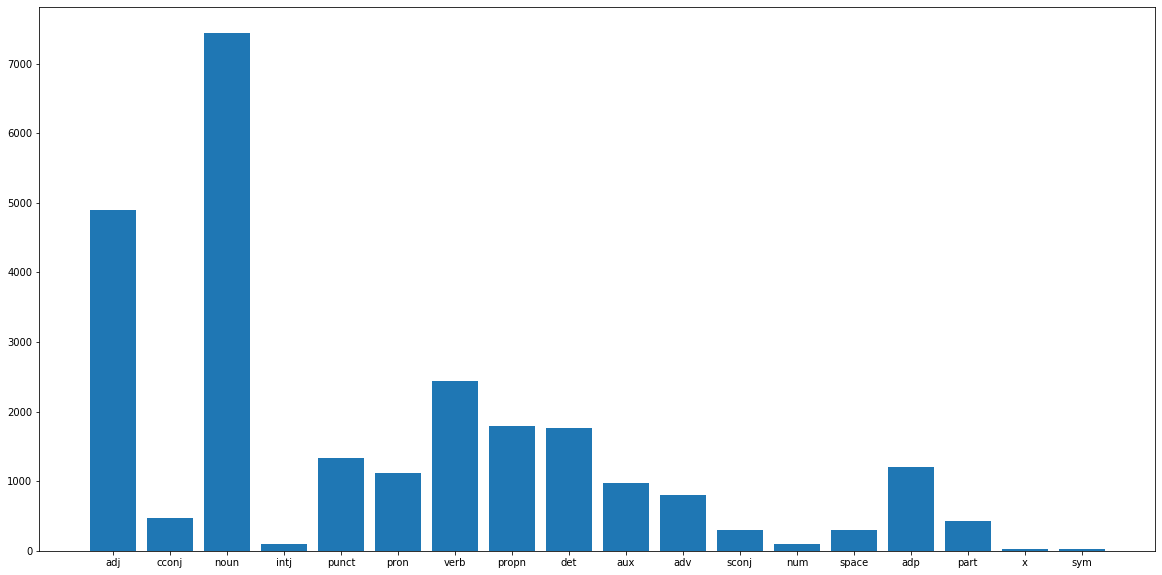

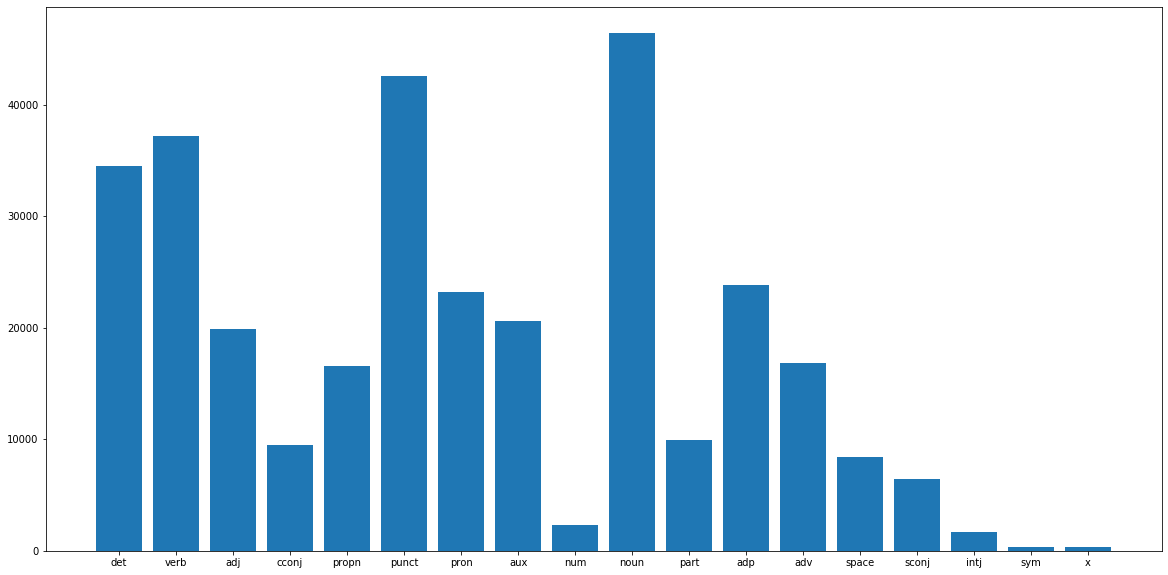

In [73]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

def bar_plot(pos):
    
    x = pos.values()
    y = pos.keys()
    #plt.figure(figsize=(20,10)
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.bar(y, x)
    plt.show()

bar_plot(pos_tf(toxics))
bar_plot(pos_tf(normals))

In [74]:
from collections import defaultdict

def pos_tf(tokens):
    pos = defaultdict(int)
    for token in tokens:
        pos[token[0].lower()] += 1
    return pos

print("unique toxic words:\n", len(pos_tf(toxics)))
print("............................")
print("unique non-toxic words:\n", len(pos_tf(normals)))

POS frequencies in toxic words:
 4442
............................
POS frequencies in non-toxic words:
 18755
